# Table of contents:

## 1. Setting up
## 2. Data cleaning
## 3. Preparing for Regression
## 4. Regression Analysis
## 5. Evaluation
## 6. Bonus1: Regression analysis on Economy score vs. Health score
## 7. Bonus2: Regression analysis with multiple variables
## 8. OLS Regression analysis on variables  

# 1. Setting up



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#define path for data import
path = r"C:\Users\Anwender\Documents\10-2023 Happiness Project\02 Data\Prepared Data"

In [4]:
df = pd.read_pickle(os.path.join(path, 'df2015_2019_dropped_2.pkl'))

# 2. Data cleaning

In [5]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


In [6]:
df.shape

(778, 11)

In [7]:
#checking for missing values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

No missing values.



In [8]:
#checking for duplicates
dups = df.duplicated()
dups.shape

(778,)

No duplicates found.



# 3. Preparing for Regression Analysis



In [9]:
#scatterplot for visuals on which variables to explore
#g = sns.pairplot(df)

I will continue to explore the relation between Happiness score and Economy score.

### `Hypothesis:`

If the Economy score increases, the happiness score will increase as well.


# 4. Regression Analysis

In [10]:
#reshaping data into numpy arrays:
X = df['Economy (GDP per Capita)'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [11]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [12]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [13]:
#create training and test sets for X and y:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [14]:
#create regression object
regression = LinearRegression()

In [15]:
#fitting training sets to the object
regression.fit(X_train, y_train)

LinearRegression()

In [16]:
#applying model to create predictions for y-values
y_predict = regression.predict(X_test)
y_predict

array([[4.03108954],
       [6.50599495],
       [4.54902261],
       [6.42733734],
       [5.3447261 ],
       [4.36118463],
       [4.60093041],
       [3.82760581],
       [4.23895987],
       [5.7052725 ],
       [5.70833987],
       [4.23586935],
       [4.37225962],
       [4.89470735],
       [5.77875993],
       [6.39614514],
       [5.31377152],
       [3.84272668],
       [6.33698441],
       [5.92508677],
       [5.46938689],
       [4.59354278],
       [4.91477491],
       [5.669004  ],
       [7.0665398 ],
       [4.2315491 ],
       [4.62901202],
       [5.32025189],
       [6.45211397],
       [5.97908989],
       [6.22318396],
       [5.53714874],
       [6.04324559],
       [5.13016093],
       [5.56550939],
       [5.69330261],
       [5.83639206],
       [5.616837  ],
       [6.0033054 ],
       [6.03272578],
       [4.16499566],
       [5.27458686],
       [5.1452818 ],
       [6.62928739],
       [6.00069113],
       [6.11556656],
       [4.20802653],
       [4.140

# 5. Evaluation

Text(0, 0.5, 'Happiness score')

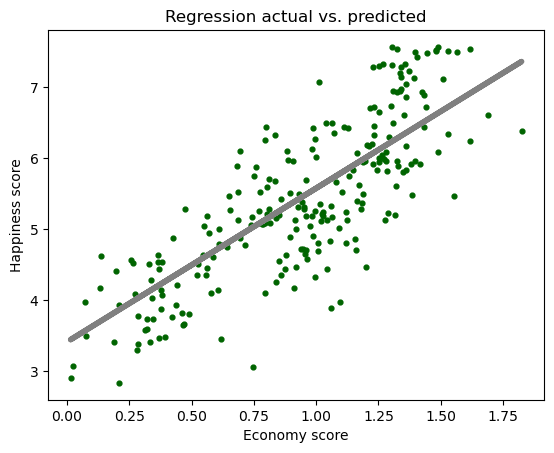

In [17]:
#creating a plot on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color = "darkgreen", s = 12)
plot_test.plot(X_test, y_predict, color = "grey", linewidth = 4)
plot_test.title("Regression actual vs. predicted")
plot_test.xlabel("Economy score")
plot_test.ylabel("Happiness score")

The regression line fits quite well on the data, but it seems like it is not a perfect fit.


In [18]:
#comparing y_predict with actual y-values
compare = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predict.flatten()})

In [19]:
compare.head(10)

,Actual,Predicted
0,3.781,4.031090
1,6.442,6.505995
2,4.513,4.549023
3,7.119,6.427337
4,5.510,5.344726
5,3.936,4.361185
6,5.044,4.600930
7,3.410,3.827606
8,4.081,4.238960
9,3.896,5.705272


The model doesn't seem to accurately predict the Happiness scores based on the Economy score alone.


In [20]:
#checking model's summary statistics:
rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Slope: ", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 Score: ", r2)

Slope:  [[2.16012458]]
Mean squared error:  0.45033372099803975
R2 Score:  0.6401001387334868


The slope\-value tells us that there is a positive relationship between the Economy and the Happiness scores. The mean squared error of 0.45 tells me that there is quite a bit of difference between the predicted values and the actual ones. The R2 score indicates that the model is a suboptimal fit, which explains that I would need to look at other models to accurately predict the Happiness score. It would probably be better to look at models which take multiple variables into consideration, in order to predict the Happiness scores more accurately.


# 6. Bonus Regression Analysis: Economy vs Health



### Hypothesis:

The higher the Economy score, the higher the Health score.


In [21]:
#reshaping Health score into numpy array:
z = df["Health (Life Expectancy)"].values.reshape(-1,1)
z

array([[0.94143   ],
       [0.94784   ],
       [0.87464   ],
       [0.88521   ],
       [0.90563   ],
       [0.88911   ],
       [0.89284   ],
       [0.91087   ],
       [0.90837   ],
       [0.93156   ],
       [0.91387   ],
       [0.86027   ],
       [0.89042   ],
       [0.81444   ],
       [0.86179   ],
       [0.69702   ],
       [0.91894   ],
       [0.89533   ],
       [0.89667   ],
       [0.80925   ],
       [0.90943   ],
       [0.76276   ],
       [0.72052   ],
       [1.02525   ],
       [0.79661   ],
       [0.89186   ],
       [0.85857   ],
       [0.79733   ],
       [0.94579   ],
       [0.78723   ],
       [0.84483   ],
       [0.8116    ],
       [0.69077   ],
       [0.7385    ],
       [0.72025   ],
       [0.95562   ],
       [0.88721   ],
       [0.8753    ],
       [0.72492   ],
       [0.6082    ],
       [0.61483   ],
       [0.67737   ],
       [0.64425   ],
       [0.59772   ],
       [0.78902   ],
       [0.99111   ],
       [0.96538   ],
       [0.790

In [22]:
# creating training and test sets:

X2_train, X2_test, z_train, z_test = train_test_split(X, z, test_size = 0.3, random_state = 0)

In [23]:
# creating another regression object

regression2 = LinearRegression()

In [24]:
# fitting object regression2 to training set
regression2.fit(X_train, z_train)

LinearRegression()

In [25]:
#create z_predict using X_test
z_predict = regression2.predict(X_test)

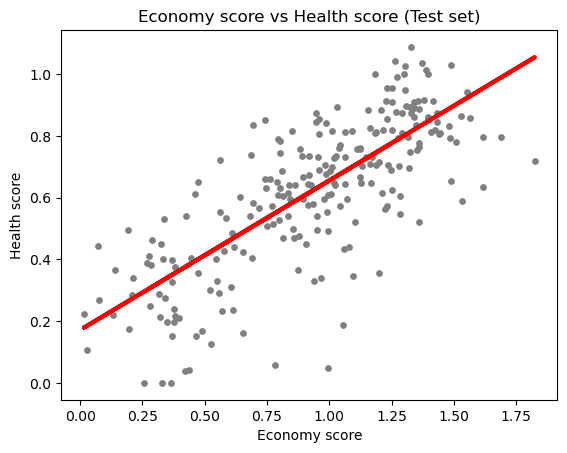

In [26]:
#create plot
plot2_test = plt
plot2_test.scatter(X_test, z_test, color='gray', s = 15)
plot2_test.plot(X_test, z_predict, color='red', linewidth =3)
plot2_test.title('Economy score vs Health score (Test set)')
plot2_test.xlabel('Economy score')
plot2_test.ylabel('Health score')
plot2_test.show()

The regression line fits to this dataset better than the regression line for the Economy vs Happiness scores.


In [27]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(z_test, z_predict)
r2_2 = r2_score(z_test, z_predict) 

In [28]:
# Print the model summary statistics.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.48419031]]
Mean squared error:  0.025669937947430038
R2 score:  0.5737133305028683


The slope indicates a positive relationship between the Economy and Health scores. The mean squared error here is rather small, therefore indicating a good fit, but the R2 score of 0.6 indicates a moderate fit.


In [29]:
#creating dataframe for direct comparison
compare2 = pd.DataFrame({"Actual": z_test.flatten(), "Predicted": z_predict.flatten()})
compare2.head(10)

,Actual,Predicted
0,0.382150,0.309705
1,0.844466,0.864453
2,0.126980,0.425799
3,0.861790,0.846822
4,0.594690,0.604156
5,0.041135,0.383696
6,0.331000,0.437434
7,0.495000,0.264094
8,0.217633,0.356299
9,0.433720,0.684972


## 7. Bonus 2: Multiple linear regression analysis



In [30]:
# performing a multiple regression analysis with Economy, Family, Freedom and Health as independent variables

X = df[["Family", "Health (Life Expectancy)", "Economy (GDP per Capita)", "Freedom", 
        "Generosity", "Trust (Government Corruption)"]].values.reshape(-1, 6)
y = df['Happiness Score'].values.reshape(-1,1)

In [31]:
X

array([[1.34951, 0.94143, 1.39651, 0.66557, 0.29678, 0.41978],
       [1.40223, 0.94784, 1.30232, 0.62877, 0.4363 , 0.14145],
       [1.36058, 0.87464, 1.32548, 0.64938, 0.34139, 0.48357],
       ...,
       [0.517  , 0.361  , 0.35   , 0.     , 0.158  , 0.025  ],
       [0.     , 0.105  , 0.026  , 0.225  , 0.235  , 0.035  ],
       [0.575  , 0.295  , 0.306  , 0.01   , 0.202  , 0.091  ]])

In [32]:
# creating training and test sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [33]:
# creating another regression object

regression = LinearRegression()

In [34]:
# fitting object regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
#create y_predict using X_test
y_predict = regression.predict(X_test)

In [36]:
rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict) 

In [37]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.66665582 1.06503027 1.06282984 1.40202707 0.4298919  1.10067715]]
Mean squared error:  0.27998199008215324
R2 score:  0.7762426514177742


### Interpretation
By taking all the life factors into account, the R2 score increases to 0.78, which indicates a better fitting regression line than the one which only takes Economy into account.

In [38]:
#creating dataframe for direct comparison
compare = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predict.flatten()})
compare.head(10)

,Actual,Predicted
0,3.781,4.285265
1,6.442,6.485001
2,4.513,4.108933
3,7.119,6.578925
4,5.510,5.214129
5,3.936,3.759431
6,5.044,4.432667
7,3.410,4.150997
8,4.081,4.449310
9,3.896,5.025840


## 8. OLS Regression analysis on variables

In [39]:
#import necessary library
import statsmodels.api as sm

In [40]:
#define predictor and response variables
X = df["Economy (GDP per Capita)"]
y = df["Happiness Score"]

In [41]:
#add constant to predictor variables
X = sm.add_constant(X)

In [42]:
#fit linear regression model
model = sm.OLS(y, X).fit()

In [43]:
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1286.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          7.25e-167
Time:                        22:32:27   Log-Likelihood:                -817.37
No. Observations:                 778   AIC:                             1639.
Df Residuals:                     776   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Interpretation
With a p-value of 0.00 smaller than 0.05, there is a significant correlation between Economy and Happiness score. It is therefore useful for predicting the Happiness score.